In [2]:
# Import packages and load the data
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

import requests
from IPython.display import Image

In [3]:
# Load the data as a NumPy array
pts = np.loadtxt('usincmoms.txt')

<IPython.core.display.Javascript object>


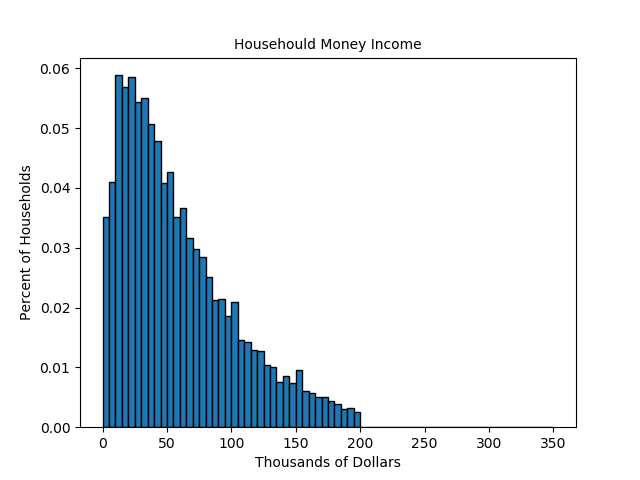

[3.51901560e-02 4.10620640e-02 5.88594790e-02 5.68361070e-02
 5.85952000e-02 5.44328360e-02 5.50604950e-02 5.06751460e-02
 4.78589420e-02 4.08390800e-02 4.26972790e-02 3.50993100e-02
 3.66023870e-02 3.16802250e-02 2.97807330e-02 2.85088990e-02
 2.50732960e-02 2.11917250e-02 2.14229670e-02 1.85902470e-02
 2.08696370e-02 1.46260890e-02 1.42296730e-02 1.29578400e-02
 1.27183380e-02 1.03893960e-02 1.00012390e-02 7.58145100e-03
 8.51468000e-03 7.37498500e-03 9.62959900e-03 6.11140900e-03
 5.75628700e-03 5.03778300e-03 5.09559400e-03 4.37709000e-03
 3.79898400e-03 2.99789400e-03 3.13829100e-03 2.57670200e-03
 1.89701450e-20 8.84640541e-26]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 250.
 350.]
[  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.
   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.  

1.8970144999999995e-20

In [27]:
#Part (a): Plotting the Histogram
%matplotlib notebook

frequencies = pts[:,0]

bins = np.zeros((43,), dtype=int)
for x in range(1, 43):
    bins[0]=0
    bins[x]=bins[x-1]+(pts[:,1][x-1]-bins[x-1])*2

widths = bins[1:] - bins[:-1]

bins_g=bins/1000
widths_g=widths/1000

heights = frequencies
heights[40]=(frequencies[40])/10
heights[41]=(frequencies[41])/20

plt.bar(bins_g[:-1], height=heights, width=widths_g, align='edge', edgecolor='k')
plt.title('Househould Money Income', fontsize=10)
plt.xlabel(r'Thousands of Dollars')
plt.ylabel(r'Percent of Households')
plt.show()

print(frequencies)
print(bins_g)
print(widths_g)
heights[40]

In [ ]:
#Part (b): 

# Define function that generates values of a log-normal pdf
def log_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub):

    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, s=sigma, loc=mu)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, loc=mu, s=sigma, loc=mu)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.lognorm.cdf(cut_ub, s=sigma, loc=mu) -
                       sts.lognorm.cdf(cut_lb, s=sigma, loc=mu))
            
    pdf_vals    = ((1/(xvals*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

def data_moments4(xvals):
    bpct_1_dat = frequencies
    
    return bpct_1_dat

def model_moments4(mu, sigma, cut_lb, cut_ub):
    i=0
    mom_model = []
    xfx = lambda x: log_norm_pdf(x, mu, sigma, cut_lb, cut_ub)
    
    While i < 40:
        if i < 40:
        (bpct_mod, bp_1_err) = intgr.quad(xfx, bins_g[i], bins_g[i+1])
        mom_model.append(bcpt_mod)
        i = i + 1
        elif
    return bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod









def err_vec4(xvals, mu, sigma, cut_lb, cut_ub, simple):

    bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat = \
        data_moments4(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat],
                          [bpct_4_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod = \
        model_moments4(mu, sigma, cut_lb, cut_ub)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod],
                          [bpct_4_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion4(params, *args):

    mu, sigma = params
    xvals, cut_lb, cut_ub, W = args
    err = err_vec4(xvals, mu, sigma, cut_lb, cut_ub, simple=False)
    crit_val = err.T @ W @ err 
    
    return crit_val